## Building Spam Classifier using Naive Bias,SVM,Random Forest,Decision Tree,Logistic Regression 

In [40]:
## import necessary packages
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer,WordNetLemmatizer
#from sklearn.feature_extraction.text import TfidVectorizer
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
import seaborn as sns

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\nidhi\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\nidhi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\nidhi\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [41]:
## load dataset 
df=pd.read_csv("spam.csv",encoding='latin-1')
df

v1                                                 v2 Unnamed: 2  \
0      ham  Go until jurong point, crazy.. Available only ...        NaN   
1      ham                      Ok lar... Joking wif u oni...        NaN   
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...        NaN   
3      ham  U dun say so early hor... U c already then say...        NaN   
4      ham  Nah I don't think he goes to usf, he lives aro...        NaN   
...    ...                                                ...        ...   
5567  spam  This is the 2nd time we have tried 2 contact u...        NaN   
5568   ham              Will Ì_ b going to esplanade fr home?        NaN   
5569   ham  Pity, * was in mood for that. So...any other s...        NaN   
5570   ham  The guy did some bitching but I acted like i'd...        NaN   
5571   ham                         Rofl. Its true to its name        NaN   

     Unnamed: 3 Unnamed: 4  
0           NaN        NaN  
1           NaN        NaN  
2           NaN        NaN  
3           NaN        NaN  
4           NaN        NaN  
...         ...        ...  
5567        NaN        NaN  
5568        NaN        NaN  
5569        NaN        NaN  
5570        NaN        NaN  
5571        NaN        NaN  

[5572 rows x 5 columns]

In [42]:
df.head() #first 5 rows

v1                                                 v2 Unnamed: 2  \
0   ham  Go until jurong point, crazy.. Available only ...        NaN   
1   ham                      Ok lar... Joking wif u oni...        NaN   
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...        NaN   
3   ham  U dun say so early hor... U c already then say...        NaN   
4   ham  Nah I don't think he goes to usf, he lives aro...        NaN   

  Unnamed: 3 Unnamed: 4  
0        NaN        NaN  
1        NaN        NaN  
2        NaN        NaN  
3        NaN        NaN  
4        NaN        NaN

In [43]:
df.shape

(5572, 5)

## Data Cleaning

In [44]:
## drop unnecessary columns:
df.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis=1,inplace=True)

In [45]:
df

v1                                                 v2
0      ham  Go until jurong point, crazy.. Available only ...
1      ham                      Ok lar... Joking wif u oni...
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...
3      ham  U dun say so early hor... U c already then say...
4      ham  Nah I don't think he goes to usf, he lives aro...
...    ...                                                ...
5567  spam  This is the 2nd time we have tried 2 contact u...
5568   ham              Will Ì_ b going to esplanade fr home?
5569   ham  Pity, * was in mood for that. So...any other s...
5570   ham  The guy did some bitching but I acted like i'd...
5571   ham                         Rofl. Its true to its name

[5572 rows x 2 columns]

## Rename column names to meaningful names:

In [46]:

df.rename(columns={'v1':'target','v2':"message"},inplace=True)
df.sample(5)

target                                            message
2405    ham                              I'm meeting Darren...
4955    ham  Ahhhh...just woken up!had a bad dream about u ...
861     ham                           Your brother is a genius
1916    ham  Fffff. Can you text kadeem or are you too far ...
4518    ham  Just got part Nottingham - 3 hrs 63miles. Good...

## encode target values using label encoder

In [47]:
## encode target values
from sklearn.preprocessing  import LabelEncoder
encoder=LabelEncoder()
df["target"]=encoder.fit_transform(df["target"])
df.head()

target                                            message
0       0  Go until jurong point, crazy.. Available only ...
1       0                      Ok lar... Joking wif u oni...
2       1  Free entry in 2 a wkly comp to win FA Cup fina...
3       0  U dun say so early hor... U c already then say...
4       0  Nah I don't think he goes to usf, he lives aro...

## checking for missing values

In [48]:

df.isnull().sum()

target     0
message    0
dtype: int64

## checking for duplicate values

In [49]:

df.duplicated().sum()

403

## remove duplicates

In [50]:

df=df.drop_duplicates()

In [51]:
df.duplicated().sum()

0

In [52]:
df.shape

(5169, 2)

## Exploratory Data Analysis

In [53]:
## sparm and ham distribution

df["target"].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

## Target distribution

<Axes: xlabel='target'>

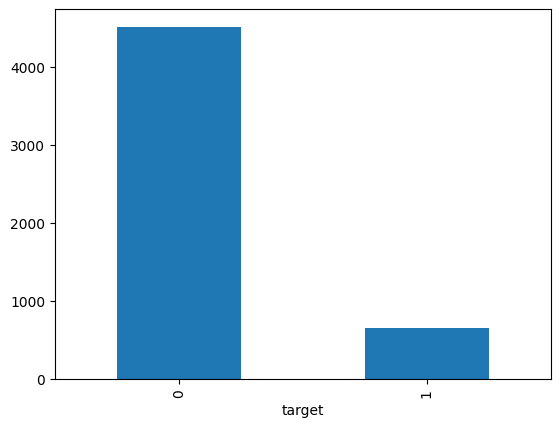

In [54]:
df['target'].value_counts().plot(kind='bar')

## observation:
Data is imbalanced

In [55]:
##to identify the nmber of characters in each meassage 
df["num_characters"]=df["message"].apply(len)

C:\Users\nidhi\AppData\Local\Temp\ipykernel_2208\2880855597.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["num_characters"]=df["message"].apply(len)


In [56]:
df.head()

target                                            message  num_characters
0       0  Go until jurong point, crazy.. Available only ...             111
1       0                      Ok lar... Joking wif u oni...              29
2       1  Free entry in 2 a wkly comp to win FA Cup fina...             155
3       0  U dun say so early hor... U c already then say...              49
4       0  Nah I don't think he goes to usf, he lives aro...              61

In [57]:
## to identify the number of words in each message:
df["message"].apply(lambda x:nltk.word_tokenize(x))

0       [Go, until, jurong, point, ,, crazy, .., Avail...
1                [Ok, lar, ..., Joking, wif, u, oni, ...]
2       [Free, entry, in, 2, a, wkly, comp, to, win, F...
3       [U, dun, say, so, early, hor, ..., U, c, alrea...
4       [Nah, I, do, n't, think, he, goes, to, usf, ,,...
                              ...                        
5567    [This, is, the, 2nd, time, we, have, tried, 2,...
5568     [Will, Ì_, b, going, to, esplanade, fr, home, ?]
5569    [Pity, ,, *, was, in, mood, for, that, ., So, ...
5570    [The, guy, did, some, bitching, but, I, acted,...
5571                  [Rofl, ., Its, true, to, its, name]
Name: message, Length: 5169, dtype: object

In [58]:
df["message"].apply(lambda x:len(nltk.word_tokenize(x)))

0       24
1        8
2       37
3       13
4       15
        ..
5567    35
5568     9
5569    15
5570    27
5571     7
Name: message, Length: 5169, dtype: int64

In [59]:
df["num_words"]=df["message"].apply(lambda x:len(nltk.word_tokenize(x)))

C:\Users\nidhi\AppData\Local\Temp\ipykernel_2208\2915462215.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["num_words"]=df["message"].apply(lambda x:len(nltk.word_tokenize(x)))


In [60]:
df.head()

target                                            message  num_characters  \
0       0  Go until jurong point, crazy.. Available only ...             111   
1       0                      Ok lar... Joking wif u oni...              29   
2       1  Free entry in 2 a wkly comp to win FA Cup fina...             155   
3       0  U dun say so early hor... U c already then say...              49   
4       0  Nah I don't think he goes to usf, he lives aro...              61   

   num_words  
0         24  
1          8  
2         37  
3         13  
4         15

In [61]:
df["message"].apply(lambda x:(nltk.sent_tokenize(x)))

0       [Go until jurong point, crazy.., Available onl...
1                        [Ok lar..., Joking wif u oni...]
2       [Free entry in 2 a wkly comp to win FA Cup fin...
3       [U dun say so early hor... U c already then sa...
4       [Nah I don't think he goes to usf, he lives ar...
                              ...                        
5567    [This is the 2nd time we have tried 2 contact ...
5568              [Will Ì_ b going to esplanade fr home?]
5569    [Pity, * was in mood for that., So...any other...
5570    [The guy did some bitching but I acted like i'...
5571                        [Rofl., Its true to its name]
Name: message, Length: 5169, dtype: object

In [62]:
df["message"].apply(lambda x:len((nltk.sent_tokenize(x))))

0       2
1       2
2       2
3       1
4       1
       ..
5567    4
5568    1
5569    2
5570    1
5571    2
Name: message, Length: 5169, dtype: int64

In [63]:
df["num_sentence"]=df["message"].apply(lambda x:len((nltk.sent_tokenize(x))))

C:\Users\nidhi\AppData\Local\Temp\ipykernel_2208\3178856299.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["num_sentence"]=df["message"].apply(lambda x:len((nltk.sent_tokenize(x))))


In [64]:
df.head()

target                                            message  num_characters  \
0       0  Go until jurong point, crazy.. Available only ...             111   
1       0                      Ok lar... Joking wif u oni...              29   
2       1  Free entry in 2 a wkly comp to win FA Cup fina...             155   
3       0  U dun say so early hor... U c already then say...              49   
4       0  Nah I don't think he goes to usf, he lives aro...              61   

   num_words  num_sentence  
0         24             2  
1          8             2  
2         37             2  
3         13             1  
4         15             1

In [65]:
df[['num_characters','num_words','num_sentence']].describe()

num_characters    num_words  num_sentence
count     5169.000000  5169.000000   5169.000000
mean        78.977945    18.455794      1.965564
std         58.236293    13.324758      1.448541
min          2.000000     1.000000      1.000000
25%         36.000000     9.000000      1.000000
50%         60.000000    15.000000      1.000000
75%        117.000000    26.000000      2.000000
max        910.000000   220.000000     38.000000

In [66]:
## describe function for harm messages
df[df['target']==0][['num_characters','num_words','num_sentence']].describe()

num_characters    num_words  num_sentence
count     4516.000000  4516.000000   4516.000000
mean        70.459256    17.123782      1.820195
std         56.358207    13.493970      1.383657
min          2.000000     1.000000      1.000000
25%         34.000000     8.000000      1.000000
50%         52.000000    13.000000      1.000000
75%         90.000000    22.000000      2.000000
max        910.000000   220.000000     38.000000

In [67]:
df[df['target']==1][['num_characters','num_words','num_sentence']].describe()

num_characters   num_words  num_sentence
count      653.000000  653.000000    653.000000
mean       137.891271   27.667688      2.970904
std         30.137753    7.008418      1.488425
min         13.000000    2.000000      1.000000
25%        132.000000   25.000000      2.000000
50%        149.000000   29.000000      3.000000
75%        157.000000   32.000000      4.000000
max        224.000000   46.000000      9.000000

## Data Visualization

C:\Users\nidhi\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


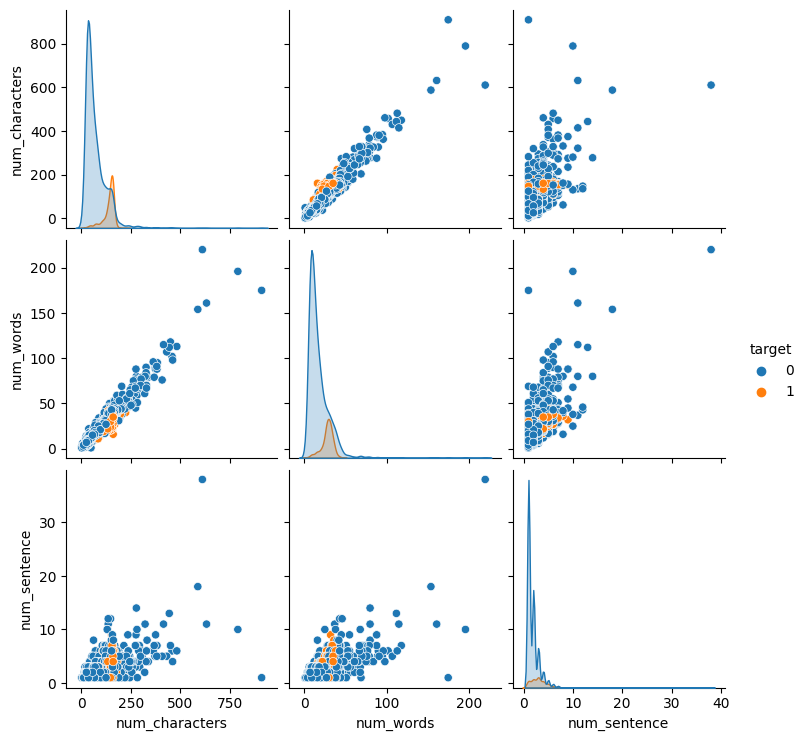

In [68]:
sns.pairplot(df,hue="target")

## Heatmap

<Axes: >

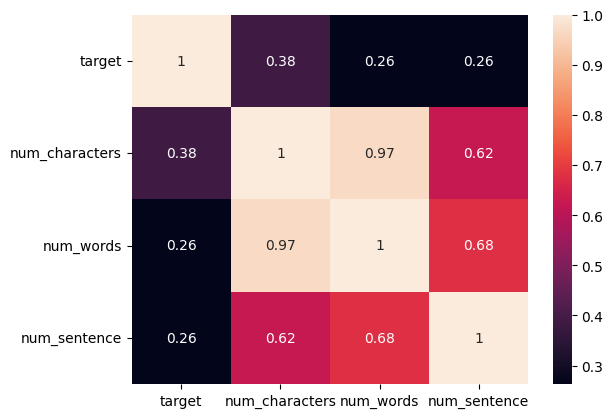

In [69]:
df_=df[['target','num_characters','num_words','num_sentence']]
sns.heatmap(df_.corr(),annot=True)


## Data preprocessing

In [70]:
from sklearn.feature_extraction.text import TfidfVectorizer


In [71]:
import re
def text_preprocessing(message):
    # Remove punctuation and convert to lowercase
    message=re.sub(r'[^a-zA-Z0-9\s]', '', str(message).lower())
    # Tokenize the text
    tokens = nltk.word_tokenize(message)
    # Remove stop words
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
     # Lemmatization
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    # Join the tokens back into a string
    preprocessed_text = ' '.join(tokens)
    return preprocessed_text 
df["processed_text"]=df["message"].apply(text_preprocessing)
df

C:\Users\nidhi\AppData\Local\Temp\ipykernel_2208\3123452414.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["processed_text"]=df["message"].apply(text_preprocessing)


target                                            message  \
0          0  Go until jurong point, crazy.. Available only ...   
1          0                      Ok lar... Joking wif u oni...   
2          1  Free entry in 2 a wkly comp to win FA Cup fina...   
3          0  U dun say so early hor... U c already then say...   
4          0  Nah I don't think he goes to usf, he lives aro...   
...      ...                                                ...   
5567       1  This is the 2nd time we have tried 2 contact u...   
5568       0              Will Ì_ b going to esplanade fr home?   
5569       0  Pity, * was in mood for that. So...any other s...   
5570       0  The guy did some bitching but I acted like i'd...   
5571       0                         Rofl. Its true to its name   

      num_characters  num_words  num_sentence  \
0                111         24             2   
1                 29          8             2   
2                155         37             2   
3                 49         13             1   
4                 61         15             1   
...              ...        ...           ...   
5567             161         35             4   
5568              37          9             1   
5569              57         15             2   
5570             125         27             1   
5571              26          7             2   

                                         processed_text  
0     go jurong point crazy available bugis n great ...  
1                               ok lar joking wif u oni  
2     free entry 2 wkly comp win fa cup final tkts 2...  
3                   u dun say early hor u c already say  
4              nah dont think go usf life around though  
...                                                 ...  
5567  2nd time tried 2 contact u u 750 pound prize 2...  
5568                          b going esplanade fr home  
5569                         pity mood soany suggestion  
5570  guy bitching acted like id interested buying s...  
5571                                     rofl true name  

[5169 rows x 6 columns]

## Naive Bayes Model

In [72]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

In [73]:

X = df['processed_text'] ## independent feature
y = df['target']  #target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Vectorize using TfidfVectorizer
vectorizer = TfidfVectorizer()
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

# Initialize a Naive Bayes model
naive_bayes_model = MultinomialNB()

# Train the model
naive_bayes_model.fit(X_train_vectorized, y_train)

# Make predictions on the testing set
y_pred = naive_bayes_model.predict(X_test_vectorized)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Print the evaluation metrics
print(f'Accuracy: {accuracy:.2f}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{classification_rep}')

Accuracy: 0.96
Confusion Matrix:
[[889   0]
 [ 41 104]]
Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       889
           1       1.00      0.72      0.84       145

    accuracy                           0.96      1034
   macro avg       0.98      0.86      0.91      1034
weighted avg       0.96      0.96      0.96      1034



## SVM

In [74]:
##model using SVM
from sklearn.svm import SVC
# Initialize the Support Vector Machine (SVM) Classifier
svm_classifier = SVC()
# Train the model
svm_classifier .fit(X_train_vectorized, y_train)

# Make predictions on the testing set
y_pred = svm_classifier .predict(X_test_vectorized)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Print the evaluation metrics
print(f'Accuracy: {accuracy:.2f}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{classification_rep}')
 

Accuracy: 0.97
Confusion Matrix:
[[887   2]
 [ 24 121]]
Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       889
           1       0.98      0.83      0.90       145

    accuracy                           0.97      1034
   macro avg       0.98      0.92      0.94      1034
weighted avg       0.98      0.97      0.97      1034



## RANDOM FOREST

In [75]:
from sklearn.ensemble import RandomForestClassifier
# Initialize a Random Forest model
random_forest_model = RandomForestClassifier(random_state=42)

# Train the model
random_forest_model.fit(X_train_vectorized, y_train)

# Make predictions on the testing set
y_pred_rf = random_forest_model.predict(X_test_vectorized)

# Evaluate the Random Forest model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
classification_rep_rf = classification_report(y_test, y_pred_rf)

# Print the evaluation metrics for Random Forest
print(f'Random Forest Accuracy: {accuracy_rf:.2f}')
print(f'Random Forest Confusion Matrix:\n{conf_matrix_rf}')
print(f'Random Forest Classification Report:\n{classification_rep_rf}')


Random Forest Accuracy: 0.97
Random Forest Confusion Matrix:
[[889   0]
 [ 31 114]]
Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       889
           1       1.00      0.79      0.88       145

    accuracy                           0.97      1034
   macro avg       0.98      0.89      0.93      1034
weighted avg       0.97      0.97      0.97      1034



## DecisionTree

In [76]:
from sklearn.tree import DecisionTreeClassifier

# Initialize a Decision Tree model
decision_tree_model = DecisionTreeClassifier(random_state=42)

# Train the model
decision_tree_model.fit(X_train_vectorized, y_train)

# Make predictions on the testing set
y_pred_dt = decision_tree_model.predict(X_test_vectorized)

# Evaluate the Decision Tree model
accuracy_dt = accuracy_score(y_test, y_pred_dt)
conf_matrix_dt = confusion_matrix(y_test, y_pred_dt)
classification_rep_dt = classification_report(y_test, y_pred_dt)

# Print the evaluation metrics for Decision Trees
print(f'Decision Tree Accuracy: {accuracy_dt:.2f}')
print(f'Decision Tree Confusion Matrix:\n{conf_matrix_dt}')
print(f'Decision Tree Classification Report:\n{classification_rep_dt}')

Decision Tree Accuracy: 0.94
Decision Tree Confusion Matrix:
[[872  17]
 [ 44 101]]
Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.98      0.97       889
           1       0.86      0.70      0.77       145

    accuracy                           0.94      1034
   macro avg       0.90      0.84      0.87      1034
weighted avg       0.94      0.94      0.94      1034



## LogisticRegression

In [77]:
from sklearn.linear_model import LogisticRegression

# Initialize a Logistic Regression model
logistic_regression_model = LogisticRegression(random_state=42)

# Train the model
logistic_regression_model.fit(X_train_vectorized, y_train)

# Make predictions on the testing set
y_pred_lr = logistic_regression_model.predict(X_test_vectorized)

# Evaluate the Logistic Regression model
accuracy_lr = accuracy_score(y_test, y_pred_lr)
conf_matrix_lr = confusion_matrix(y_test, y_pred_lr)
classification_rep_lr = classification_report(y_test, y_pred_lr)

# Print the evaluation metrics for Logistic Regression
print(f'Logistic Regression Accuracy: {accuracy_lr:.2f}')
print(f'Logistic Regression Confusion Matrix:\n{conf_matrix_lr}')
print(f'Logistic Regression Classification Report:\n{classification_rep_lr}')

Logistic Regression Accuracy: 0.96
Logistic Regression Confusion Matrix:
[[881   8]
 [ 38 107]]
Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.99      0.97       889
           1       0.93      0.74      0.82       145

    accuracy                           0.96      1034
   macro avg       0.94      0.86      0.90      1034
weighted avg       0.95      0.96      0.95      1034

